API keys are removed

In [44]:
pwd

'/home/wsuser/work'

In [1]:
!pip install tensorflow

     |████████████████████████████████| 65 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 35.3 MB/s eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.35.0
    Uninstalling grpcio-1.35.0:
      Successfully uninstalled grpcio-1.35.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247


In [2]:
!pip install numpy

In [3]:
!pip install pandas

In [45]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_b72a3086530044cfb979750da0de0c96 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_b72a3086530044cfb979750da0de0c96 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_b72a3086530044cfb979750da0de0c96 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_b72a3086530044cfb979750da0de0c96)

streaming_body_8 = client_b72a3086530044cfb979750da0de0c96.get_object(Bucket='implementdeeplearningtechniquesto-donotdelete-pr-mwfkeai0saywwq', Key='cell_images.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [5]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_8.read()), 'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [6]:
import os
os.listdir('/home/wsuser/work/cell_images')

['Parasitized', 'Uninfected']

In [7]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
import numpy as np

In [8]:
datagen = ImageDataGenerator(rescale=1/225.0, validation_split=0.2)

In [9]:
img_width=64
img_height=64

In [10]:
train_ds = datagen.flow_from_directory(directory=r'/home/wsuser/work/cell_images',target_size=(64, 64), class_mode='binary', batch_size=16, subset='training')

Found 22048 images belonging to 2 classes.


In [11]:
valid_ds = datagen.flow_from_directory(directory=r'/home/wsuser/work/cell_images',target_size=(64, 64), class_mode='binary', batch_size=16, subset='validation')

Found 5510 images belonging to 2 classes.


In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16,(3,3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 5,
                    validation_data = valid_ds,
                    validation_steps = len(valid_ds))

Epoch 1/5
1378/1378 [==============================] - 93s 67ms/step - loss: 0.6387 - accuracy: 0.6332 - val_loss: 0.2958 - val_accuracy: 0.9314
Epoch 2/5
1378/1378 [==============================] - 90s 65ms/step - loss: 0.2650 - accuracy: 0.9118 - val_loss: 0.2066 - val_accuracy: 0.9292
Epoch 3/5
1378/1378 [==============================] - 89s 65ms/step - loss: 0.2084 - accuracy: 0.9267 - val_loss: 0.1978 - val_accuracy: 0.9336
Epoch 4/5
1378/1378 [==============================] - 90s 65ms/step - loss: 0.1927 - accuracy: 0.9296 - val_loss: 0.1859 - val_accuracy: 0.9318
Epoch 5/5
1378/1378 [==============================] - 89s 65ms/step - loss: 0.1910 - accuracy: 0.9313 - val_loss: 0.1899 - val_accuracy: 0.9298


In [17]:
model.save('model.h5')

In [18]:
!tar -zcvf model.tgz model.h5

model.h5


In [19]:
!ls -la

total 9320
drwxr-x--- 4 wsuser wscommon    4096 Jan 18 13:59 .
drwxrwx--- 1 wsuser wscommon    4096 Jan 18 13:52 ..
drwxrwx--- 4 wsuser wscommon    4096 Jan 18 13:51 cell_images
-rw-rw---- 1 wsuser wscommon 4923640 Jan 18 13:59 model.h5
-rw-rw---- 1 wsuser wscommon 4595216 Jan 18 13:59 model.tgz
drwxr-x--- 2 wsuser wscommon    4096 Jan 18 13:48 .virtual_documents


In [20]:
result = model.evaluate(valid_ds)

345/345 [==============================] - 7s 20ms/step - loss: 0.1899 - accuracy: 0.9298


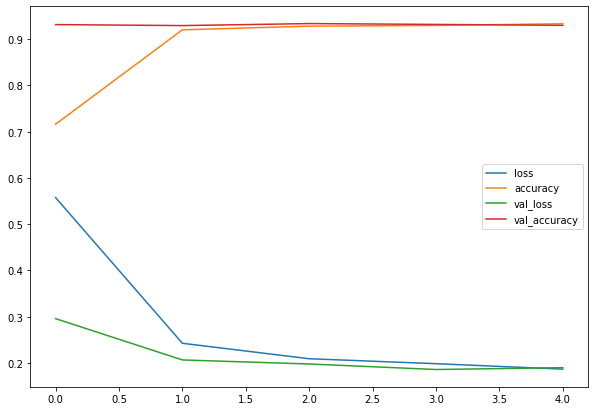

In [21]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [24]:
!pip install watson-machine-learning-client 

     |████████████████████████████████| 538 kB 24.9 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : ""
}
client = APIClient(wml_credentials)

In [28]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client, 'Implement Deep Learning Techniques To Detect Malaria Using Ibm Cloud')
print('space uid: ' + space_uid)

space uid: d006ca40-889e-48e9-85e0-192ea77fdafb


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [31]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [32]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.7")
software_spec_uid

'65e171d7-72d1-55d9-8ebb-f813d620c9bb'

In [36]:
model_details = client.repository.store_model(model='model.tgz', meta_props= {
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

model_id = client.repository.get_model_uid(model_details)

In [ ]:
model_id

In [ ]:
client.repository.download(model_id, 'ibm-model.tar.gz')